Hugging Face transformers ViT Example   
   
From [Huggin Face ViT FineTuning Example](https://huggingface.co/blog/fine-tune-vit)   

Oh HongSuk

In [43]:
from datasets import load_dataset

In [44]:
ds = load_dataset("beans")
ds

Found cached dataset beans (/home/ohs/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)
100%|██████████| 3/3 [00:00<00:00, 726.33it/s]


DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [45]:
ex = ds["train"][400]
ex

{'image_file_path': '/home/ohs/.cache/huggingface/datasets/downloads/extracted/54334e81a38222598fa2ed5d70ce417a3306d1616868510a6b2f56c7a9e94758/train/bean_rust/bean_rust_train.141.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7FC75C3CC7C0>,
 'labels': 1}

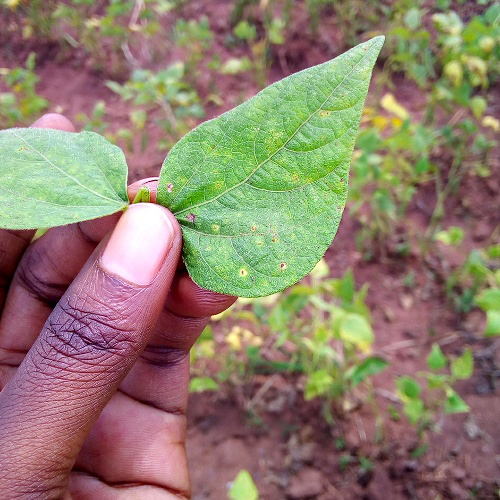

In [46]:
image = ex["image"]
image

In [47]:
labels = ds["train"].features["labels"]
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [48]:
labels.int2str(ex["labels"])

'bean_rust'

Loading cached processed dataset at /home/ohs/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-a6a943931a91a386.arrow
Loading cached processed dataset at /home/ohs/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-efcfba7212acefba.arrow
Loading cached processed dataset at /home/ohs/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-bacd7a5a541bc2bc.arrow


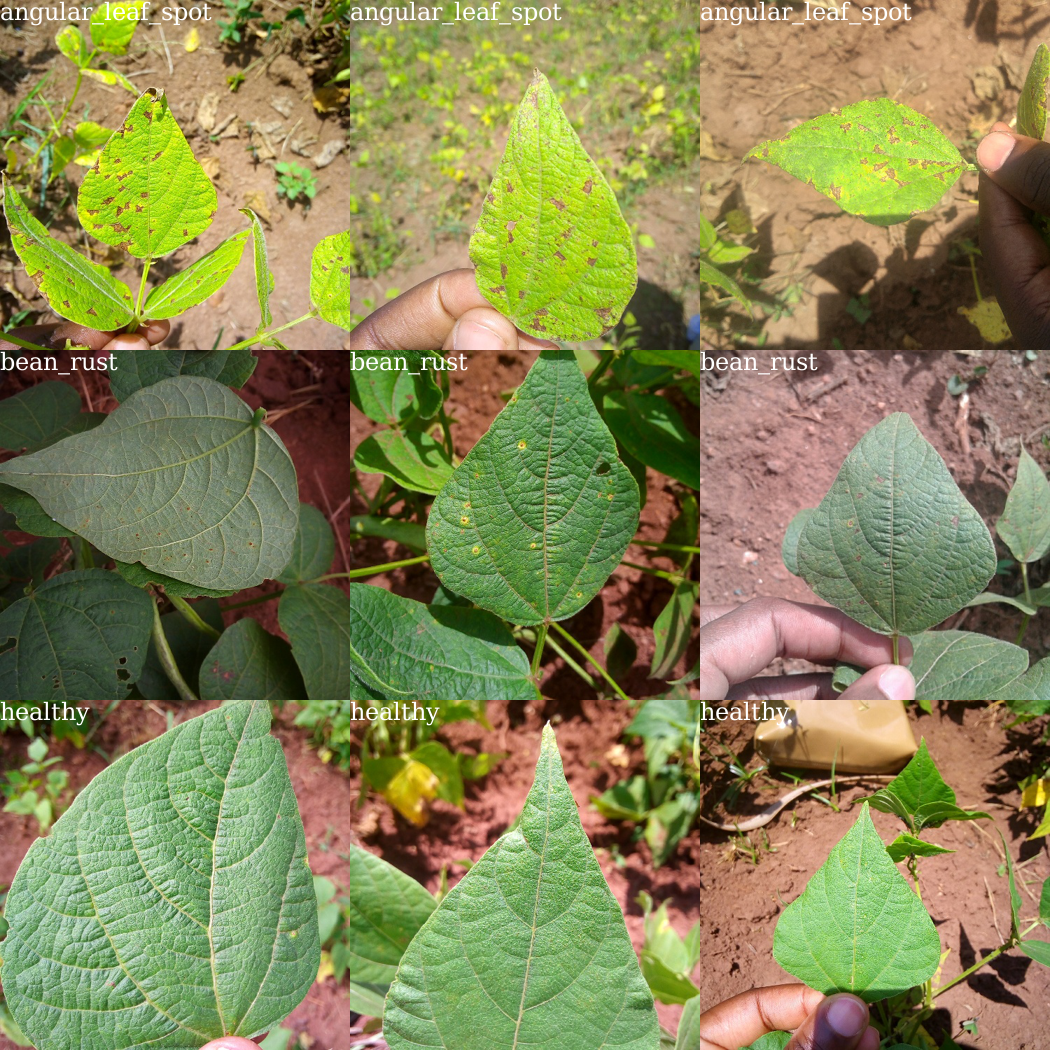

In [49]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int =1234, examples_per_class: int =3, size: tuple =(350,350)):
    w, h = size
    labels = ds["train"].features["labels"].names
    grid = Image.new("RGB", size=(examples_per_class*w, len(labels)*h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf", 24)

    for label_id, label in enumerate(labels):
        
        ds_slice = ds["train"].filter(lambda ex: ex["labels"]==label_id).shuffle(seed).select(range(examples_per_class))

        for i, example in enumerate(ds_slice):
            image = example["image"]
            idx = examples_per_class*label_id + i
            box = (idx%examples_per_class * w, idx//examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)
    
    return grid

show_examples(ds, seed=random.randint(0,1337), examples_per_class=3)

In [50]:
from transformers import ViTFeatureExtractor

model_name_or_path = "google/vit-base-patch16-224-in21k"

feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [51]:
feature_extractor(image, return_tensors="pt")

{'pixel_values': tensor([[[[-0.0118,  0.0980,  0.3176,  ..., -0.0510,  0.1216,  0.0902],
          [-0.0588,  0.0824,  0.2549,  ...,  0.0275,  0.1922,  0.1608],
          [-0.1451, -0.0667,  0.0353,  ...,  0.0431,  0.1373,  0.0980],
          ...,
          [ 0.3176,  0.3098,  0.3255,  ..., -0.6314, -0.5686, -0.3020],
          [ 0.3412,  0.3569,  0.3255,  ..., -0.5529, -0.6314, -0.5294],
          [ 0.3020,  0.2863,  0.2314,  ..., -0.5608, -0.6941, -0.7020]],

         [[ 0.0667,  0.1765,  0.3569,  ..., -0.0824,  0.1216,  0.0745],
          [-0.0588,  0.0980,  0.2549,  ...,  0.0588,  0.2941,  0.2549],
          [-0.2627, -0.1451, -0.0275,  ...,  0.3020,  0.4275,  0.3569],
          ...,
          [-0.1843, -0.1843, -0.1608,  ..., -0.7804, -0.6941, -0.3569],
          [-0.1216, -0.1137, -0.1686,  ..., -0.7255, -0.7725, -0.6314],
          [-0.1765, -0.1922, -0.2627,  ..., -0.7255, -0.8196, -0.8118]],

         [[-0.3255, -0.1922,  0.0588,  ..., -0.1765,  0.0353,  0.0275],
          [-0

In [52]:
def process_example(example):
    inputs = feature_extractor(example["image"], return_tensors="pt")
    inputs["labels"] = example["labels"]
    
    return inputs

process_example(ds["train"][0])

{'pixel_values': tensor([[[[ 0.0667,  0.0667,  0.1373,  ..., -0.3020, -0.1216, -0.0824],
          [-0.0353, -0.0980, -0.0588,  ..., -0.3961, -0.1216, -0.0196],
          [-0.0510, -0.1373, -0.1922,  ..., -0.4431, -0.2471, -0.0588],
          ...,
          [ 0.7176,  0.6941,  0.6941,  ..., -0.3255, -0.3569, -0.4118],
          [ 0.7020,  0.7255,  0.7176,  ..., -0.3490, -0.2314, -0.1843],
          [ 0.6941,  0.6941,  0.6863,  ..., -0.4353, -0.2863, -0.1529]],

         [[-0.2784, -0.2706, -0.1922,  ...,  0.0510,  0.2392,  0.2863],
          [-0.3882, -0.4510, -0.4118,  ..., -0.2000,  0.1294,  0.2863],
          [-0.4118, -0.4980, -0.5451,  ..., -0.4510, -0.1137,  0.1608],
          ...,
          [ 0.2392,  0.2000,  0.2000,  ..., -0.5922, -0.6078, -0.6627],
          [ 0.1843,  0.2078,  0.2157,  ..., -0.6000, -0.4980, -0.4588],
          [ 0.1608,  0.1686,  0.1843,  ..., -0.6784, -0.5451, -0.4196]],

         [[-0.3961, -0.3804, -0.3020,  ..., -0.6314, -0.2784, -0.2000],
          [-0

In [53]:
def transform(example_batch):
    inputs = feature_extractor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]

    return inputs

prepared_ds = ds.with_transform(transform)
prepared_ds["train"][0:2]

{'pixel_values': tensor([[[[ 0.0667,  0.0667,  0.1373,  ..., -0.3020, -0.1216, -0.0824],
          [-0.0353, -0.0980, -0.0588,  ..., -0.3961, -0.1216, -0.0196],
          [-0.0510, -0.1373, -0.1922,  ..., -0.4431, -0.2471, -0.0588],
          ...,
          [ 0.7176,  0.6941,  0.6941,  ..., -0.3255, -0.3569, -0.4118],
          [ 0.7020,  0.7255,  0.7176,  ..., -0.3490, -0.2314, -0.1843],
          [ 0.6941,  0.6941,  0.6863,  ..., -0.4353, -0.2863, -0.1529]],

         [[-0.2784, -0.2706, -0.1922,  ...,  0.0510,  0.2392,  0.2863],
          [-0.3882, -0.4510, -0.4118,  ..., -0.2000,  0.1294,  0.2863],
          [-0.4118, -0.4980, -0.5451,  ..., -0.4510, -0.1137,  0.1608],
          ...,
          [ 0.2392,  0.2000,  0.2000,  ..., -0.5922, -0.6078, -0.6627],
          [ 0.1843,  0.2078,  0.2157,  ..., -0.6000, -0.4980, -0.4588],
          [ 0.1608,  0.1686,  0.1843,  ..., -0.6784, -0.5451, -0.4196]],

         [[-0.3961, -0.3804, -0.3020,  ..., -0.6314, -0.2784, -0.2000],
          [-0

In [54]:
inputs = feature_extractor(image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[-0.0118,  0.0980,  0.3176,  ..., -0.0510,  0.1216,  0.0902],
          [-0.0588,  0.0824,  0.2549,  ...,  0.0275,  0.1922,  0.1608],
          [-0.1451, -0.0667,  0.0353,  ...,  0.0431,  0.1373,  0.0980],
          ...,
          [ 0.3176,  0.3098,  0.3255,  ..., -0.6314, -0.5686, -0.3020],
          [ 0.3412,  0.3569,  0.3255,  ..., -0.5529, -0.6314, -0.5294],
          [ 0.3020,  0.2863,  0.2314,  ..., -0.5608, -0.6941, -0.7020]],

         [[ 0.0667,  0.1765,  0.3569,  ..., -0.0824,  0.1216,  0.0745],
          [-0.0588,  0.0980,  0.2549,  ...,  0.0588,  0.2941,  0.2549],
          [-0.2627, -0.1451, -0.0275,  ...,  0.3020,  0.4275,  0.3569],
          ...,
          [-0.1843, -0.1843, -0.1608,  ..., -0.7804, -0.6941, -0.3569],
          [-0.1216, -0.1137, -0.1686,  ..., -0.7255, -0.7725, -0.6314],
          [-0.1765, -0.1922, -0.2627,  ..., -0.7255, -0.8196, -0.8118]],

         [[-0.3255, -0.1922,  0.0588,  ..., -0.1765,  0.0353,  0.0275],
          [-0

In [55]:
import torch

def collate_fn(batch):
    return {
        "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
        "labels": torch.tensor([x["labels"] for x in batch])
    }

In [56]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [57]:
from transformers import ViTForImageClassification

labels = ds["train"].features["labels"].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels = len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
from transformers import TrainingArguments

traing_args = TrainingArguments(
    output_dir="./vit-base-beans",
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    fp16=True,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="tensorboard",
    load_best_model_at_end=True,
)

In [59]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=traing_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

Using cuda_amp half precision backend


In [60]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/home/ohs/anaconda3/envs/torch110/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1034
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 36
/home/ohs/anaconda3/envs/torch110/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to ./vit-base-beans
Configuration saved in ./vit-base-beans/config.json
Model weights saved in ./vit-base-beans/pytorch_model.bin
Feature extractor saved in ./vit-base-beans/preprocessor_config.json


***** train metrics *****
  epoch                    =         4.0
  total_flos               = 298497957GF
  train_loss               =       0.278
  train_runtime            =  0:01:29.64
  train_samples_per_second =      46.137
  train_steps_per_second   =       0.402


In [61]:
metrics = trainer.evaluate(prepared_ds["validation"])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 133
  Batch size = 64


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =      0.985
  eval_loss               =     0.0816
  eval_runtime            = 0:00:02.10
  eval_samples_per_second =     63.194
  eval_steps_per_second   =      1.425


In [63]:
kwargs={
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": "beans",
    "tags": ["image-classification"],
}

if traing_args.push_to_hub:
    trainer.push_to_hub("cheers", **kwargs)
else:
    trainer.create_model_card(**kwargs)